## Supervised vs unsupervised

Unsupervised learning = Given X, predict Y

Definitions:
* Regression models predict a **continuous response** (numerical).
* Classification models predict a **discrete response** (categorical).

When we don't have a Y variable to predict, we are in the realm of **unsupervised learning**. Since there is no Y variable, unsupervised learning has no measurable "goal". Instead, unsupervised learning seeks to **represent the data in new ways**. 

Today we're introducing **clustering**; however, there are many other types of unsupervised learning.

> Data without a Y variable are sometimes referred to as **unlabeled** data. This is because the Y variable is often refered to as a **label**.

## Issues with unsupervised learning

Since there is no Y variable to "supervise" our learning:

* **What is "correct"?** Since there's no Y variable, we don't have an easy to way know if we're even doing a good job.
* **Tuning parameter selection.** Many unsupervised models have tuning parameters. How do we tune them if we don't know how to evaluate our model?
* **Unpredictability (clustering).** In clustering, it is very difficult to predict what our model will give us. It's possible that a clustering algorithm won't give us actionable results.

## Introduction to Clustering

**Clustering** is a task in which we seek to group our observations in **homogenous clusters**.
Since it's unsupervised, it is up to us, the data scientists, to decide what we mean by "homogenous".

## Uses of clustering
1. Marketing
2. Political polling
3. Recommender systems

## Clustering algorithms 

---

The are many different algorithms that can perform clustering given a dataset. 

These algorithms nearly always reduce to difficult optimization problems which may converge on a local minimum (similarly to gradient descent).

- **K-Means** (mean centroids)
- **DBSCAN** (density based)
- **Hierarchical** (nested clusters by merging or splitting successively)
- **Affinity Propagation** (graph based approach to let points 'vote' on their preferred 'exemplar')
- **Mean Shift** (can find number of clusters)
- **Spectral Clustering**
- **Agglomerative Clustering** (suite of algorithms all based on applying the same criteria/characteristics of one cluster to others)

## K-means clustering
---
K-Means is the most popular clustering algorithm and one of the easier methods to understand and other clustering techniques use some of the same assumptions that k-means relies on.

- **k** is the number of clusters.
- **Means** refers to the mean points of the k clusters.

**You must choose $k$, the number of clusters, in advance.**

The algorithm takes your entire dataset and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**What does K-means do?**

> $K$-means partitions the data into sets of points (clusters). These clusters minimize the within-cluster sum-of-squares.

**K-means iterative fitting:**
1. Pick a value for $k$ (the number of clusters to create).
2. Initialize $k$ 'centroids' (starting points). These do not have to be actual data points!
3. Create clusters by assigning each data point to its nearest centroid.
4. Make your clusters better. Reassign each centroid to the center of its cluster.
5. Repeat steps 3-4 until the centroids converge and do not change across iterations.

$K$-means is guaranteed to converge.

## Things that could go wrong with clustering
1. Wispy flat blobs (dissect vertically instead of horizontally)
2. Outliers or lone wolf points
3. When it doesnt make sense to cluster at all!

## Initializing Centroids

---

There are different methods of initializing centroids. For instance:

- Randomly
- Manually
- Special KMeans++ method in Sklearn (_This initializes the centroids to be generally distant from each other_)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help, but rarely used in practice.

## Choosing $k$
This still remains an open question. After all, we're tuning a tuning parameter with no metric for success! Here are three ideas:

* Make an educated guess
    - Industry knowledge (there are five kinds of Democrats...)
    - Visualization (probably impossible if you have more than 2 variables)
* Judge based on a pseudo-evaluation metric, like the **silhouette score**.
* If you're using the resulting cluster labels as input to a supervised learning method later, you can tune $k$ to have the best supervised learning model. This is **transfer learning**.


**Knowing your domain and dataset is essential. Evaluating the clusters visually is a must (if possible).**

# Code!!

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

# Let's make some more blobs to test K-Means on
data, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5)

df = pd.DataFrame(data, columns=["x1", "x2"])
df.head()

,x1,x2
0,7.081642,-5.248171
1,-3.036735,-0.129646
2,5.117565,-3.323573
3,-1.807058,-0.335986
4,4.519789,-5.469635


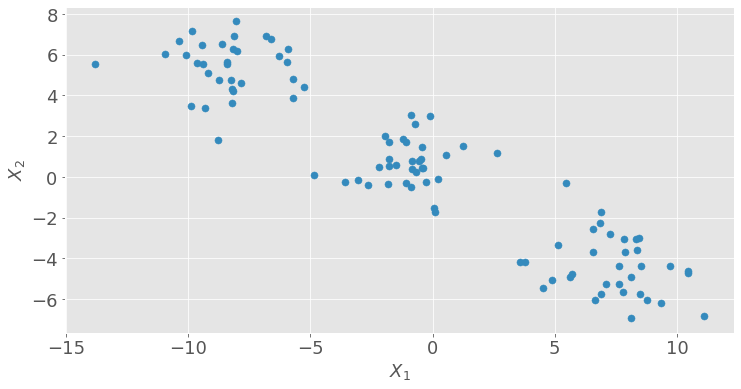

In [5]:
# Plot the scatter
ax = df.plot(kind="scatter", x="x1", y="x2", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
# Let's prepare our X matrix
X = df.loc[:, ['x1', 'x2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [7]:
# (thread) How many K here?
# I do: Fit a k-means clustering model
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)